In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import json
import re
import nltk
import ast

In [ ]:
df = pd.read_csv("source_data/keywords.csv")
pd.set_option('display.max_colwidth', None)  # Display all column content

df.head()

In [ ]:
df.shape

**LEE's METHOD**

In [ ]:

# Function to parse the string and extract names
def extract_names(keyword_string):
    # Safely evaluate the string to a Python object
    keyword_list = ast.literal_eval(keyword_string)
    # Extract names
    names = [keyword['name'] for keyword in keyword_list]
    return names

# Apply the function to the DataFrame
df['names'] = df['keywords'].apply(extract_names)

# Display the DataFrame
df.head(4)

**MODEL THAT LETS FIND TARGET KEYWORD IN ALL OF THE DATA**

**STEP 1: PARSE THE KEYWORDS IN "keywords_df"**

In [ ]:
# Function to extract keywords from the "keywords" column
def extract_keywords(keyword_str):
    try:
        keyword_list = ast.literal_eval(keyword_str)
        return [keyword["name"] for keyword in keyword_list]
    except (ValueError, SyntaxError):
        return[]

# Apply the function to extract keywords
df["Keywords"] = df["keywords"].apply(extract_keywords)

**STEP 2: USE REGEX TO FILTER THE KEYWORDS**

In [ ]:
# Define a fucntion to check if the target keyword is in the list of keywords
def contains_target_keyword(keywords_list, target):
    pattern = rf"\b{target}\b"
    return any(pd.Series(keywords_list).str.contains(pattern, regex=True, case=False, na=False))
               
               
# Check for presence of target keyword in the extracted keywords
target_keyword = "toy"
df["contains_target"] = df["keywords_extracted"].apply(contains_target_keyword, target=target_keyword)            

In [ ]:
df.drop(columns={"Keywords"}, inplace=True)

In [ ]:
df.head()

**REGEX METHOD NO.2**

**STEP 1: Extract Keywords**

In [76]:
import ast
from collections import Counter

keywords_df = pd.read_csv("source_data/keywords.csv")

# Parse the JSON-like string in the 'keywords' column
def parse_keywords(data):
    try:
        return ast.literal_eval(data)
    except ValueError:
        return[] # return an empty list if there's an error
    
# Apply the function to extract keywords
keywords_df["keywords_parsed"] = keywords_df["keywords"].apply(parse_keywords)

In [77]:
# Extract the keywords names
def extract_keywords(data):
    return [d["name"] for d in data if "name" in d]

keywords_df['keywords_list'] = keywords_df['keywords_parsed'].apply(extract_keywords)

**STEP 2: COUNT KEYWORD FREQUENCY**

In [78]:
# Flatten the list of keywords and count the occurrences
all_keywords = [keyword for sublist in keywords_df['keywords_list'] for keyword in sublist]
keyword_counts = Counter(all_keywords)

# Display the most common keywords
print(keyword_counts.most_common(20))


[('woman director', 3115), ('independent film', 1930), ('murder', 1308), ('based on novel', 835), ('musical', 734), ('sex', 685), ('violence', 651), ('nudity', 636), ('biography', 629), ('revenge', 626), ('suspense', 590), ('love', 574), ('female nudity', 563), ('sport', 544), ('police', 454), ('teenager', 441), ('duringcreditsstinger', 440), ('sequel', 439), ('friendship', 411), ('world war ii', 394)]


In [80]:
# Assuming 'all_keywords' is a list of all keywords extracted from your dataset
keyword_counts = Counter(all_keywords)
top_20_keywords = keyword_counts.most_common(20)

print("Top 20 Keywords and Their Counts:")
for keyword, count in top_20_keywords:
    print(f"{keyword}: {count}")

Top 20 Keywords and Their Counts:
woman director: 3115
independent film: 1930
murder: 1308
based on novel: 835
musical: 734
sex: 685
violence: 651
nudity: 636
biography: 629
revenge: 626
suspense: 590
love: 574
female nudity: 563
sport: 544
police: 454
teenager: 441
duringcreditsstinger: 440
sequel: 439
friendship: 411
world war ii: 394


**Plot Top 20 Keywords**

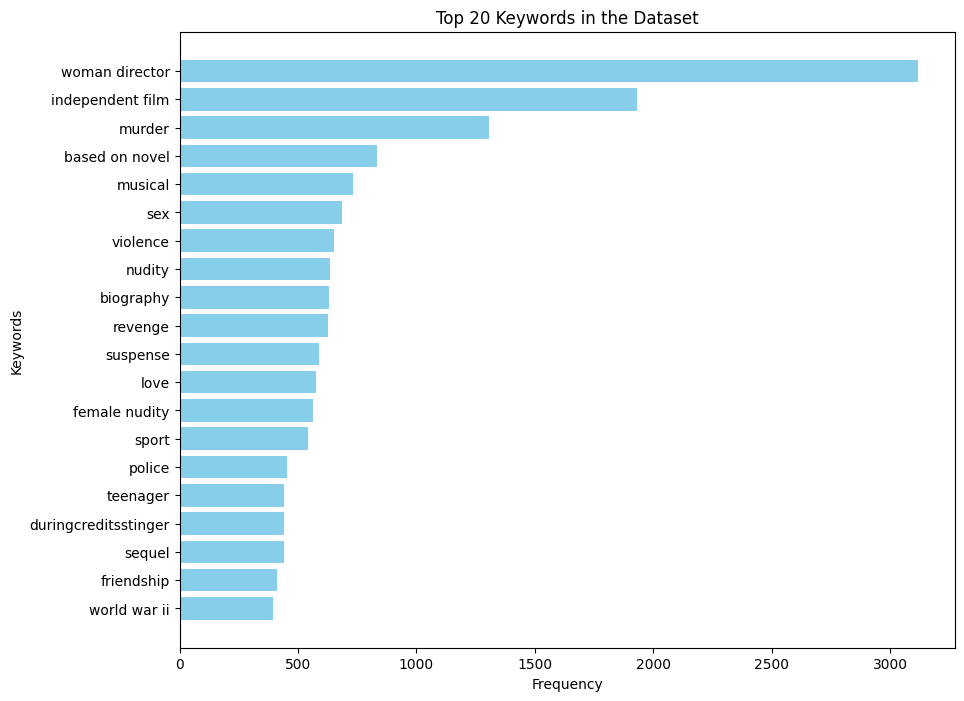

In [81]:
import matplotlib.pyplot as plt

# Get the top 20 keywords and their counts
top_20_keywords = keyword_counts.most_common(20)
keywords, counts = zip(*top_20_keywords)  # This unpacks the keywords and their counts into separate lists

plt.figure(figsize=(10, 8))
plt.barh(keywords, counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Keywords')
plt.title('Top 20 Keywords in the Dataset')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest counts at the top
plt.show()


**FILTERED KEYWORDS BY "LOVE"**


**FILTER AND DISPLAY RESULTS**

In [79]:
import re

# Filter keywords by a regex pattern
pattern = re.compile(r'love', re.IGNORECASE)  # adjust pattern as needed

# Filter the counted keywords using the pattern
filtered_keywords = {word: count for word, count in keyword_counts.items() if pattern.search(word)}

# Display filtered keywords and their counts
print(filtered_keywords)


{'new love': 110, 'love at first sight': 31, 'lovesickness': 48, 'gloves': 5, 'love': 574, 'forbidden love': 49, 'star crossed lovers': 12, 'love triangle': 153, 'free love': 25, "love of one's life": 107, 'love letter': 20, 'secret love': 44, 'falling in love': 81, 'in love with enemy': 14, 'true love': 7, 'first love': 28, 'tragic love': 24, 'lover (female)': 28, 'h.p. lovecraft': 16, 'lover': 53, 'unrequited love': 42, 'obsessive love': 7, 'loss of lover': 44, 'motherly love': 15, 'love spell': 1, 'unlikely lovers': 3, 'love quadrangle': 1, 'impossible love': 7, 'the love bug': 3, 'nun in love': 1, 'ex-lover': 17, 'teenage love': 17, 'love and romance': 5, 'platonic love': 6, 'lovebird': 1, 'lovers': 49, 'interracial love': 3, 'young love': 23, 'loss of loved one': 6, 'love affair': 31, 'dead lover': 2, 'eternal love': 2, 'one-sided love': 12, 'lost love': 7, 'love sickness': 4, 'love crime': 2, 'best friends in love': 12, 'black gloved killer': 3, 'baron love': 1, 'lovesick': 3, 'l